<a href="https://colab.research.google.com/github/DarekGit/face-detection-pytorch/blob/master/DSFDplus_multi_infer_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##https://github.com/cs-giung/face-detection-pytorch

origin  https://github.com/Tencent/FaceDetection-DSFD


In [ ]:
#!git clone https://github.com/cs-giung/face-detection-pytorch
!git clone https://github.com/DarekGit/face-detection-pytorch

Cloning into 'face-detection-pytorch'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 143 (delta 3), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (143/143), 25.50 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [ ]:
%cd /content/face-detection-pytorch

/content/face-detection-pytorch


In [ ]:
#@title
#Data load to WiDER
import os
def Wider_load(val=True,train=False,test=False):
  os.makedirs('WIDER/', exist_ok=True)

  if val:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
    !gdown https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr -O WIDER/tempv.zip
    !unzip -q WIDER/tempv.zip -d WIDER
    !rm WIDER/tempv.zip  

  if train:
    ### WIDER Face Training Images
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
    !gdown https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH -O WIDER/temptr.zip
    !unzip -q WIDER/temptr.zip -d WIDER
    !rm WIDER/temptr.zip
  
  if test:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
    !gdown https://drive.google.com/uc?id=1tTpUJZEQMKDVxKT6100V5FwDuGX_8sDi -O WIDER/tempt.zip
    !unzip -q WIDER/tempt.zip -d WIDER
    !rm WIDER/tempt.zip


  ### Face annotations
  !wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip -O WIDER/tempa.zip
  !unzip -q WIDER/tempa.zip -d WIDER
  !rm WIDER/tempa.zip

  #annotations tool
  !gdown https://drive.google.com/uc?id=1RYB01PZrwYMc6-oopBYF77gFZCeE1T7n -O WIDER/tools.py

  #mAP
  !gdown 'https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR'

  ### Examples and formats of the submissions
  #!wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/example/Submission_example.zip


In [ ]:
#Data load to WIDER
Wider_load()

from mAP import mAP, plot_mAP
from WIDER.tools import plot_marks


Downloading...
From: https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr
To: /content/face-detection-pytorch/WIDER/tempv.zip
363MB [00:04, 86.7MB/s]
--2021-04-21 18:03:34--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘WIDER/tempa.zip’

WIDER/tempa.zip     100%[===================>]   3.42M  1.92MB/s    in 1.8s    

2021-04-21 18:03:37 (1.92 MB/s) - ‘WIDER/tempa.zip’ saved [3591642/3591642]

Downloading...
From: https://drive.google.com/uc?id=1RYB01PZrwYMc6-oopBYF77gFZCeE1T7n
To: /content/face-detection-pytorch/WIDER/tools.py
100% 6.28k/6.28k [00:00<00:00, 12.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR
To: /content/face-det

#TinyFace

In [ ]:
!mkdir detectors/tinyface/weights
!gdown 'https://drive.google.com/uc?id=1vdKzrfQ4cXeI157NEJoeI1ECZ66GFEKE' -O ./detectors/tinyface/weights/checkpoint_50.pth



Downloading...
From: https://drive.google.com/uc?id=1vdKzrfQ4cXeI157NEJoeI1ECZ66GFEKE
To: /content/face-detection-pytorch/detectors/tinyface/weights/checkpoint_50.pth
241MB [00:03, 67.8MB/s]


In [ ]:
import cv2, random
from detectors import TinyFace
from utils import draw_bboxes, crop_thumbnail, draw_bbox

# load detector with device(cpu or cuda)
DET = TinyFace(device='cuda')

# load image in RGB
img = cv2.imread('bts.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get bboxes with some confidence in scales for image pyramid
bboxes = DET.detect_faces(img, conf_th=0.9, scales=[0.5, 1])

# and draw bboxes on your image
img_bboxed = draw_bboxes(img, bboxes, fill=0.1, thickness=2)

# or crop thumbnail of someone
i = random.randrange(0, len(bboxes))
img_thumb, bbox_thumb = crop_thumbnail(img, bboxes[i], padding=1, size=100)

# you can use 'bbox_thumb' as bbox in thumbnail-coordinate system.
img_thumb_bboxed = draw_bbox(img_thumb, bbox_thumb)

[Tiny Face] loading with cuda


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth



[Tiny Face] finished loading (11.0686 sec)


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_bboxed[:,:,::-1])

In [ ]:
m = {'path': 'bts.jpg',
     'marks': list(bboxes[:,:4]),
     'persons': ['Pers'+str(i) for i,b in enumerate(list(bboxes)[:3])]}
plot_marks(img,m,list(bboxes),)

##Multi [0.5, 1 ]  - AP50 49.4%  mAP - 17,9%

In [ ]:
#@title
#All WIDERFACE Validation detection
from WIDER.tools import annotations

WIDER_Val = annotations('val')


import time as t
t0=t.time()


gbxs=[]; dbxs=[]

for i,m in enumerate(WIDER_Val):
  path=m['file_name']
  #img=Image.open(path); depth=img.layers
  #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 

  img = cv2.imread(path)[:,:,::-1] #[:,:,[2,1,0]]
  depth=img.shape[2]

  if depth ==1: img=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3))
  dbx = DET.detect_faces(img, conf_th=0.9, scales=[0.5, 1])
  
  dbxs.append(list(dbx))
  gbxs.append([bx['bbox'] for bx in m['annotations']])

#print(detector.net)
print('time {} s  for {} detections, fps: {:5.2f}'.format(t.time()-t0,i+1, (i+1)/int(t.time()-t0)))

time 386.91212368011475 s  for 3226 detections, fps:  8.36


Downloading...
From: https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR
To: /content/face-detection-pytorch/mAP.py
100% 5.26k/5.26k [00:00<00:00, 4.89MB/s]
All 0.50:   AP: 49.38%   Recall: 54.52%   IoU: 0.5
All 0.00:   AP: 65.01%   Recall: 69.76%   IoU: 0.0
large   :   AP: 93.22%   Recall: 94.06%   IoU: 0.5
medium  :   AP: 85.11%   Recall: 87.83%   IoU: 0.5
small   :   AP: 32.27%   Recall: 40.67%   IoU: 0.5
mAP     :   AP: 17.90%   Recall: 23.72%   IoU: 0.5 - 0.95


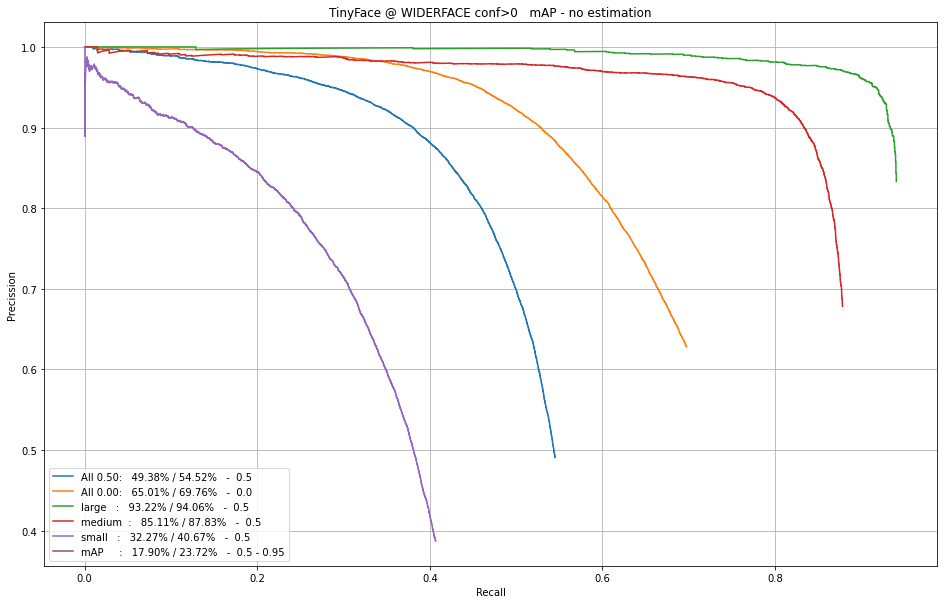

In [ ]:
#mAP plot

IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','All 0.00','large','medium','small','mAP'],1,'TinyFace @ WIDERFACE conf>0  ',file='TinyFace_WiderFace_mAP')

##Multi [ 1 , 2 ]  - AP50 - 70%  mAP - 25,4%

In [ ]:
#@title
#All WIDERFACE Validation detection
from WIDER.tools import annotations

WIDER_Val = annotations('val')


import time as t
t0=t.time()


gbxs=[]; dbxs=[]

for i,m in enumerate(WIDER_Val):
  path=m['file_name']
  #img=Image.open(path); depth=img.layers
  #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 

  img = cv2.imread(path)[:,:,::-1] #[:,:,[2,1,0]]
  depth=img.shape[2]

  if depth ==1: img=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3))
  dbx = DET.detect_faces(img, conf_th=0.9, scales=[1,2])
  
  dbxs.append(list(dbx))
  gbxs.append([bx['bbox'] for bx in m['annotations']])

#print(detector.net)
print('time {} s  for {} detections, fps: {:5.2f}'.format(t.time()-t0,i+1, (i+1)/int(t.time()-t0)))

time 1201.6334519386292 s  for 3226 detections, fps:  2.69


Downloading...
From: https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR
To: /content/face-detection-pytorch/mAP.py
100% 5.26k/5.26k [00:00<00:00, 9.09MB/s]
All 0.50:   AP: 66.97%   Recall: 73.22%   IoU: 0.5
All 0.00:   AP: 81.76%   Recall: 87.74%   IoU: 0.0
large   :   AP: 82.06%   Recall: 83.71%   IoU: 0.5
medium  :   AP: 90.06%   Recall: 91.45%   IoU: 0.5
small   :   AP: 56.88%   Recall: 66.56%   IoU: 0.5
mAP     :   AP: 25.42%   Recall: 33.05%   IoU: 0.5 - 0.95


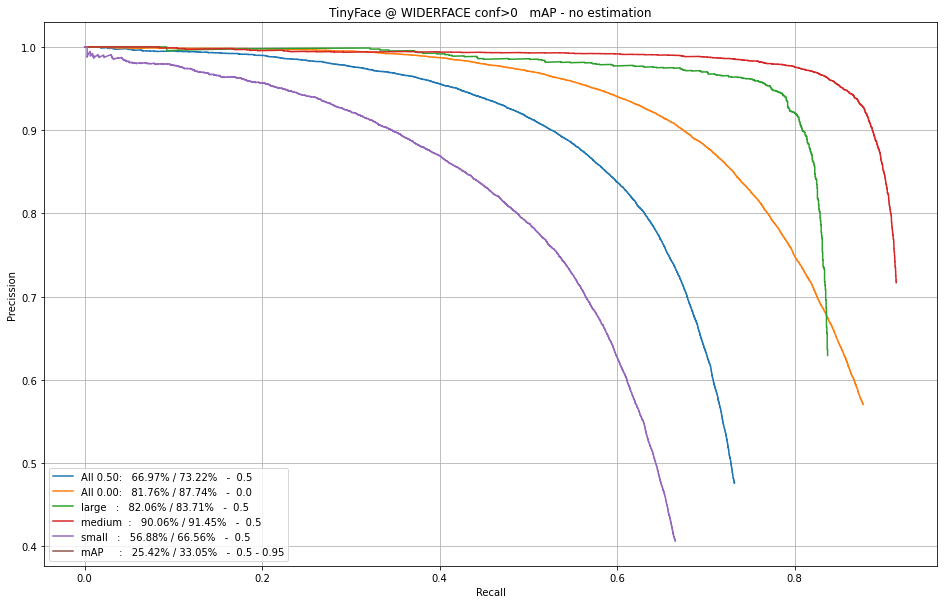

In [ ]:
#mAP plot

IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','All 0.00','large','medium','small','mAP'],1,'TinyFace @ WIDERFACE conf>0  ',file='TinyFace_WiderFace_mAP')

##Multi [0.5, 1 , 2, 3]  - AP50 71.4% mAP - 28%

In [ ]:
#@title
#All WIDERFACE Validation detection
from WIDER.tools import annotations

WIDER_Val = annotations('val')


import time as t
t0=t.time()


gbxs=[]; dbxs=[]

for i,m in enumerate(WIDER_Val):
  path=m['file_name']
  #img=Image.open(path); depth=img.layers
  #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 

  img = cv2.imread(path)[:,:,::-1] #[:,:,[2,1,0]]
  depth=img.shape[2]

  if depth ==1: img=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3))
  dbx = DET.detect_faces(img, conf_th=0.9, scales=[0.5,1,2,3])
  
  dbxs.append(list(dbx))
  gbxs.append([bx['bbox'] for bx in m['annotations']])

#print(detector.net)
print('time {} s  for {} detections, fps: {:5.2f}'.format(t.time()-t0,i+1, (i+1)/int(t.time()-t0)))

time 3395.587555170059 s  for 3226 detections, fps:  0.95


Downloading...
From: https://drive.google.com/uc?id=1PtEsobTFah3eiCDbSsYblOGbe2fmkjGR
To: /content/face-detection-pytorch/mAP.py
100% 5.26k/5.26k [00:00<00:00, 4.80MB/s]
All 0.50:   AP: 71.41%   Recall: 77.64%   IoU: 0.5
All 0.00:   AP: 84.73%   Recall: 91.46%   IoU: 0.0
large   :   AP: 92.95%   Recall: 93.89%   IoU: 0.5
medium  :   AP: 90.03%   Recall: 91.54%   IoU: 0.5
small   :   AP: 62.62%   Recall: 71.88%   IoU: 0.5
mAP     :   AP: 28.06%   Recall: 35.85%   IoU: 0.5 - 0.95


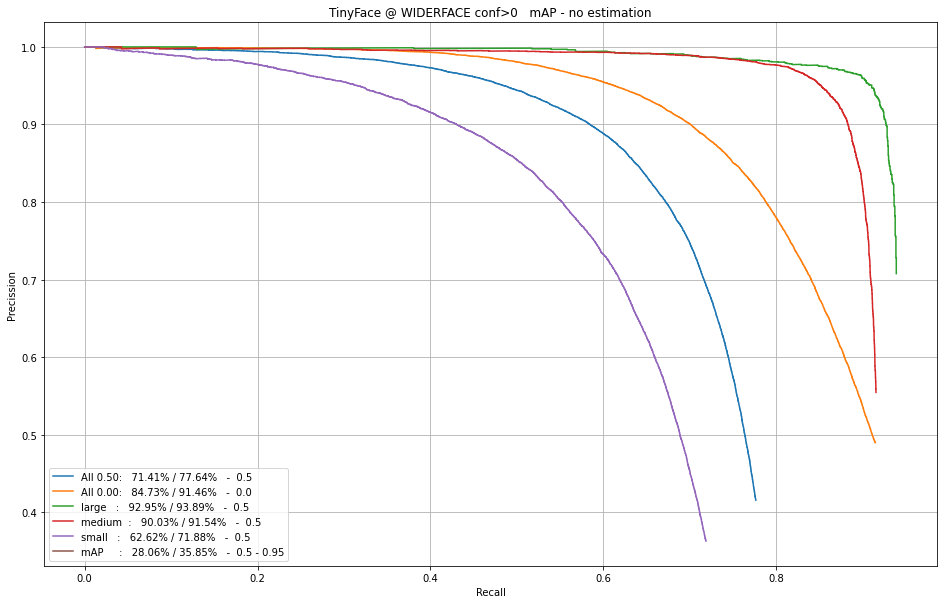

In [ ]:
#mAP plot

IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','All 0.00','large','medium','small','mAP'],1,'TinyFace @ WIDERFACE conf>0  ',file='TinyFace_WiderFace_mAP')

In [ ]:
 #example of detections

for l in [0,1,2,3,4]:
  im=WIDER_Val[l]
  m = { 'path' : im['file_name'],
        'marks' : [bx['bbox'] for bx in im['annotations']],
        'persons' : ['' for bx in im['annotations']]
       }

  print('------------------------  idx  ',l,'  gtx/dbxs',len(m['marks']),'/',len(dbxs[l]))
  plot_marks(cv2.imread(m['path'])[:,:,::-1],m,dbxs[l],figsize=(18,14))

#DSFD 

##vgg AP50 - 74% mAP - 41,3%

## !! Replace in detectors/dsfd/box_utils.py 

class Detect(Function):  to class Detect(nn.Module):

and add super(Detect, self).\_\_init\_\_()



!! restart comand/control+M

In [ ]:
%cd /content/face-detection-pytorch
from mAP import mAP, plot_mAP
from WIDER.tools import plot_marks

/content/face-detection-pytorch


In [ ]:
!mkdir detectors/dsfd/weights
!gdown 'https://drive.google.com/uc?id=1ZVzJqbjoymnKl11jDc-VGkVgzBqR3rZZ' -O ./detectors/dsfd/weights/dsfd_vgg_0.880.pth


Downloading...
From: https://drive.google.com/uc?id=1ZVzJqbjoymnKl11jDc-VGkVgzBqR3rZZ
To: /content/face-detection-pytorch/detectors/dsfd/weights/dsfd_vgg_0.880.pth
199MB [00:02, 89.0MB/s]


In [ ]:
import cv2, random
from detectors import DSFD
from utils import draw_bboxes, crop_thumbnail, draw_bbox
import numpy as np


# load detector with device(cpu or cuda)
DET = DSFD(device='cuda')

# load image in RGB
img = cv2.imread('worlds-largest-selfie.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

full_s = [0.5, 0.75, 1, 1.5, 2.25, 3.375]

max_s = np.sqrt((4000.*4000.)/(img.shape[0]*img.shape[1]))
scales = [*[s for s in full_s if s <max_s], max_s]

# get bboxes with some confidence in scales for image pyramid
bboxes = DET.detect_faces( img, conf_th=0.7, scales=scales)

# and draw bboxes on your image
img_bboxed = draw_bboxes(img, bboxes, fill=0.1, thickness=2)

# or crop thumbnail of someone
i = random.randrange(0, len(bboxes))
img_thumb, bbox_thumb = crop_thumbnail(img, bboxes[i], padding=1, size=100)

# you can use 'bbox_thumb' as bbox in thumbnail-coordinate system.
img_thumb_bboxed = draw_bbox(img_thumb, bbox_thumb)

[DSFD] loading with cuda
[DSFD] finished loading (0.5953 sec)


740  - Detected Boxes


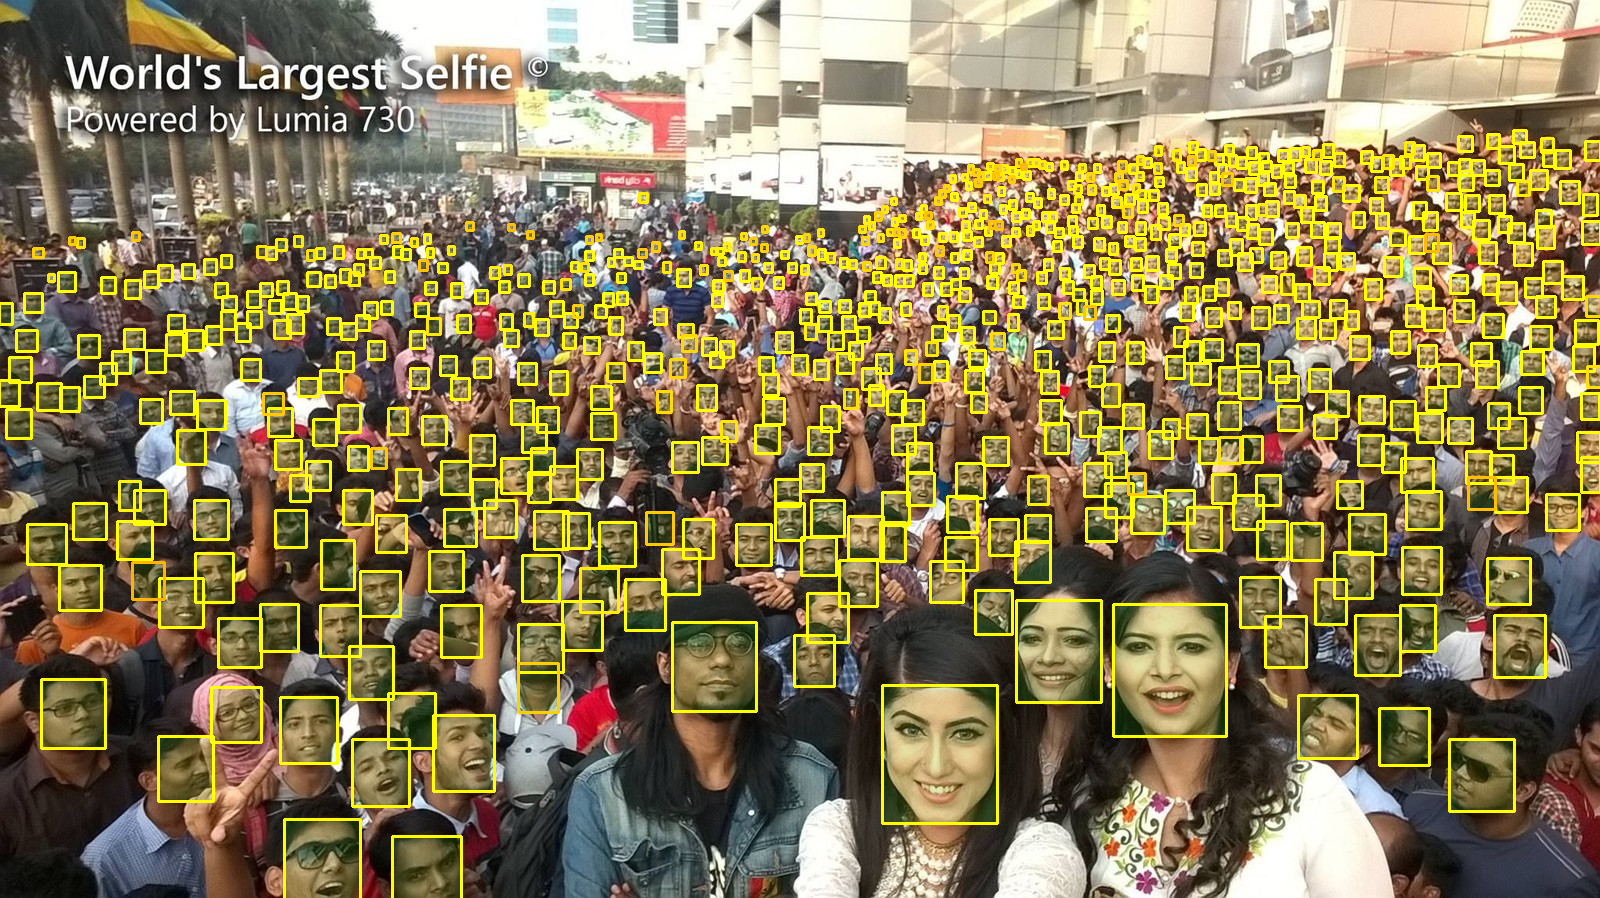

In [ ]:
from google.colab.patches import cv2_imshow
print(bboxes.shape[0]," - Detected Boxes")
cv2_imshow(img_bboxed[:,:,::-1])

In [ ]:
#@title
#All WIDERFACE Validation detection
from WIDER.tools import annotations
import cv2, random
from detectors import DSFD
from utils import draw_bboxes, crop_thumbnail, draw_bbox

# load detector with device(cpu or cuda)
DET = DSFD(device='cuda')

WIDER_Val = annotations('val')


import time as t
t0=t.time()


gbxs=[]; dbxs=[]
full_s = [0.5, 0.75, 1, 1.5, 2.25, 3.375]

for i,m in enumerate(WIDER_Val):
  path=m['file_name']
  #img=Image.open(path); depth=img.layers
  #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 

  img = cv2.imread(path)[:,:,::-1] #[:,:,[2,1,0]]
  depth=img.shape[2]
  max_s = np.sqrt((4000.*4000.)/(img.shape[0]*img.shape[1]))
  scales = [*[s for s in full_s if s <max_s], max_s]

  if depth ==1: img=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3))
  dbx = DET.detect_faces(img, conf_th=0.7, scales=scales)
  
  dbxs.append(list(dbx))
  gbxs.append([bx['bbox'] for bx in m['annotations']])

#print(detector.net)
print('time {} s  for {} detections, fps: {:5.2f}'.format(t.time()-t0,i+1, (i+1)/int(t.time()-t0)))

[DSFD] loading with cuda
[DSFD] finished loading (0.4886 sec)
time 17767.689121246338 s  for 3226 detections, fps:  0.18


All 0.50:   AP: 74.03%   Recall: 75.53%   IoU: 0.5
All 0.00:   AP: 77.36%   Recall: 78.44%   IoU: 0.0
large   :   AP: 89.73%   Recall: 91.68%   IoU: 0.5
medium  :   AP: 91.32%   Recall: 91.62%   IoU: 0.5
small   :   AP: 67.40%   Recall: 69.09%   IoU: 0.5
mAP     :   AP: 41.32%   Recall: 45.87%   IoU: 0.5 - 0.95


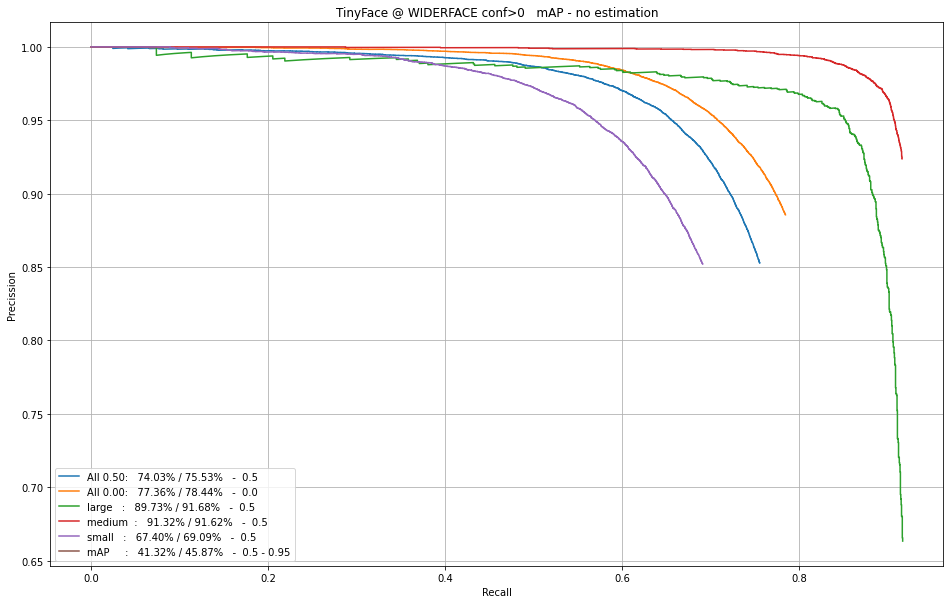

In [ ]:
IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','All 0.00','large','medium','small','mAP'],1,'DSFD-VGG @ WIDERFACE conf>0  ',file='DSFD-VGG_WiderFace_mAP')

In [ ]:
 #example of detections

for l in [0,1,2,3,4]:
  im=WIDER_Val[l]
  m = { 'path' : im['file_name'],
        'marks' : [bx['bbox'] for bx in im['annotations']],
        'persons' : []
       }

  plot_marks(cv2.imread(m['path'])[:,:,::-1],m,dbxs[l],figsize=(18,14))

##Resnet152  - TBD

#MTCNN  

##AP50 - 40%    mAP - 22,5%

In [ ]:
%cd /content/face-detection-pytorch
from mAP import mAP, plot_mAP
from WIDER.tools import plot_marks

/content/face-detection-pytorch


In [ ]:
!pip install facenet-pytorch
from facenet_pytorch import MTCNN

#inicjalizacja sieci mtcnn, pelny opis dostepny: help(MTCNN)
mtcnn = MTCNN(image_size=224, margin=0, keep_all=True) 

     |████████████████████████████████| 1.9MB 7.6MB/s 


In [ ]:
#@title
import cv2, random
from utils import draw_bboxes, crop_thumbnail, draw_bbox
import numpy as np


# load image in RGB
img = cv2.imread('worlds-largest-selfie.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


dboxes,confs = mtcnn.detect(img)
if type(dboxes)!=np.ndarray: dboxes=[]; confs=[]
bboxes=np.array([[*(np.array(bx)+0.5).astype('int'),confs[i]] for i,bx in enumerate(dboxes)])

# and draw bboxes on your image
img_bboxed = draw_bboxes(img, bboxes, fill=0.1, thickness=2)

# or crop thumbnail of someone
i = random.randrange(0, len(bboxes))
img_thumb, bbox_thumb = crop_thumbnail(img, bboxes[i], padding=1, size=100)

# you can use 'bbox_thumb' as bbox in thumbnail-coordinate system.
img_thumb_bboxed = draw_bbox(img_thumb, bbox_thumb)

312  - Detected Boxes


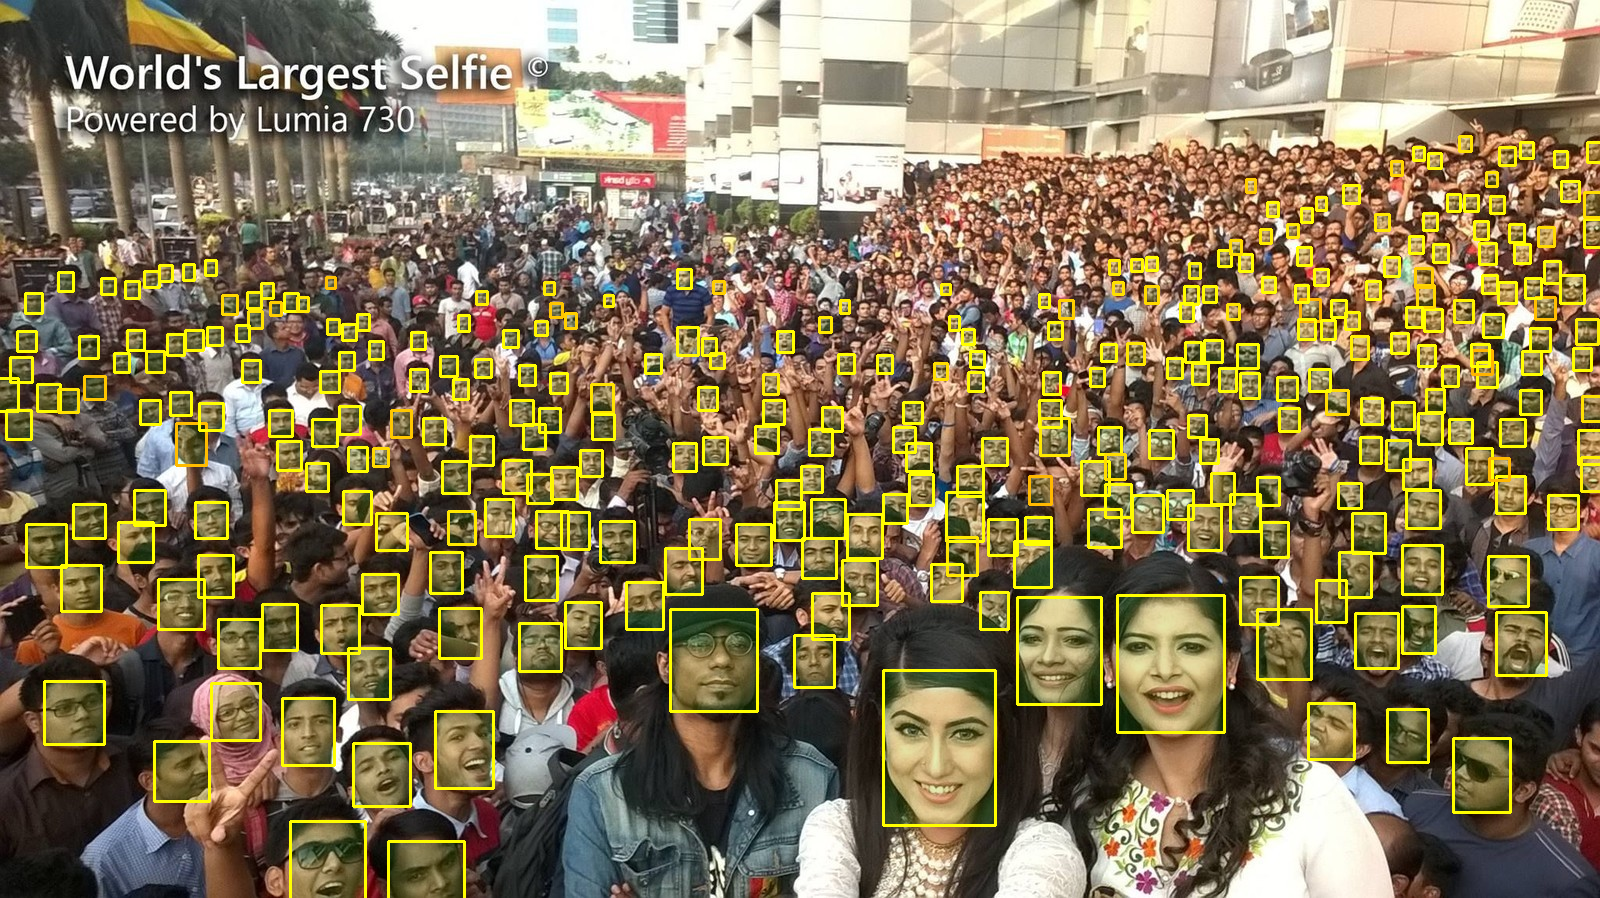

In [ ]:
from google.colab.patches import cv2_imshow
print(bboxes.shape[0]," - Detected Boxes")
cv2_imshow(img_bboxed[:,:,::-1])

In [ ]:
#@title
#All WIDERFACE Validation detection
from WIDER.tools import annotations
import cv2, random


WIDER_Val = annotations('val')


import time as t
t0=t.time()


gbxs=[]; dbxs=[]

for i,m in enumerate(WIDER_Val):
  path=m['file_name']
  #img=Image.open(path); depth=img.layers
  #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) 

  img = cv2.imread(path)[:,:,::-1] #[:,:,[2,1,0]]
  depth=img.shape[2] 

  if depth ==1: img=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3))
  dboxes,confs = mtcnn.detect(img)
  if type(dboxes)!=np.ndarray: dboxes=[]; confs=[]
  dbx = [[*(np.array(bx)+0.5).astype('int'),confs[i]] for i,bx in enumerate(dboxes)]
  
  dbxs.append(list(dbx))
  gbxs.append([bx['bbox'] for bx in m['annotations']])

#print(detector.net)
print('time {} s  for {} detections, fps: {:5.2f}'.format(t.time()-t0,i+1, (i+1)/int(t.time()-t0)))

time 2004.2021749019623 s  for 3226 detections, fps:  1.61


All 0.50:   AP: 39.68%   Recall: 40.33%   IoU: 0.5
All 0.00:   AP: 41.54%   Recall: 41.83%   IoU: 0.0
large   :   AP: 84.86%   Recall: 85.70%   IoU: 0.5
medium  :   AP: 77.23%   Recall: 78.15%   IoU: 0.5
small   :   AP: 24.04%   Recall: 24.57%   IoU: 0.5
mAP     :   AP: 22.54%   Recall: 25.45%   IoU: 0.5 - 0.95


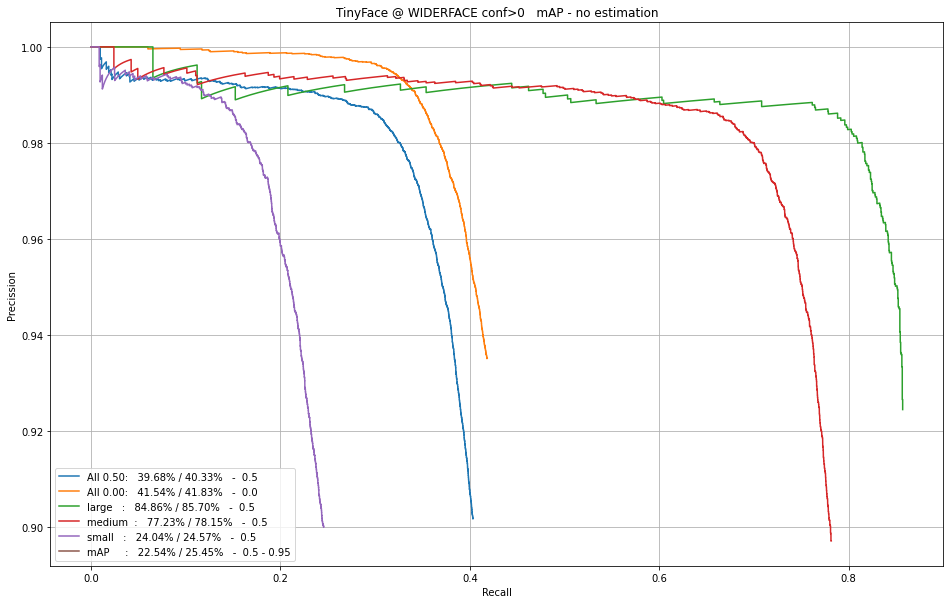

In [ ]:
IoUs=[.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.0]
m,d=mAP(gbxs,dbxs,data=True)
plot_mAP(m,d,['All 0.50','All 0.00','large','medium','small','mAP'],1,'MTCNN @ WIDERFACE conf>0  ',file='MTCNN_WiderFace_mAP')

In [ ]:
 #example of detections

for l in [0,1,2,3,4]:
  im=WIDER_Val[l]
  m = { 'path' : im['file_name'],
        'marks' : [bx['bbox'] for bx in im['annotations']],
        'persons' : []
       }

  plot_marks(cv2.imread(m['path'])[:,:,::-1],m,dbxs[l],figsize=(18,14))